In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(2021) #Set seed to allow for replicable results

In [84]:
#Method to draw grid, setting height, width and the min/max value of each cell
#Grid will be a NxM array

def createGrid(grid_width, grid_height, min_val, max_val):
    grid = np.random.randint(min_val,max_val, grid_width*grid_height) #Set each cell to a random value between min_val and max_val
    grid = grid.reshape(grid_width, grid_height) #Re-order axes to make rows x columns
    return grid

In [85]:
#User input for width, height and min/max values of cells
grid = createGrid(grid_width = 10, grid_height = 10, min_val = 0, max_val = 100)
#Create a copy so original grid remains unedited
game_grid = grid.copy()
print(game_grid)

[[85 57  0 94 86 44 62 91 29 21]
 [93 24 12 70 70 33  7  1 97 26]
 [66 48 99 63 49 16 50 54 52 93]
 [ 5 49 38 14 71 85 70 41 21 25]
 [10 36 19 57 82 90 15 40 76 53]
 [11 19 33 78 17 89 50  7 27 63]
 [51  9 25 71 84 27 75 27 19 31]
 [50 89 27 18 53 32 20 95 87  3]
 [97 20 18 70 38 90 53 62 93 26]
 [47 91 60  7 93 33 89 37 95 48]]


In [86]:
## Game mode 1 - Using our heuristic method with smallest absolute values between next cells as path selection

In [87]:
def heuristic_absolute(grid, start_position=(0,0), end_position=(game_grid.shape[0]-1, game_grid.shape[1]-1)):
        """
        Args:
            start_position - tuple of type int defining starting coordinates
            end_position - tuple of type int defining ending coordinates
            
        Returns:
            optimal_path - list of tuples of type int, defining the path of grid coordinates yielding shortest path
            list_vals - list of ints, defining values corresponding to coordinates in optimal_path
        """
        
        # initialising variables
        optimal_path = []
        optimal_vals = []

        current = start_position
        travelled = 999999 # setting this to be a higher number than any in grid to mark as travelled
        
        # define grid edges, where b_edge = bottom edge and r_edge = right edge (note do not need to define l_edge, t_edge as these are 0 and 0)
        b_edge = grid.shape[0]-1
        r_edge = grid.shape[1]-1
        
        # define valid positional movements within grid, determined by starting position before each move
        while (current != end_position):
            if (current[0] < b_edge) and (current[1] < r_edge):
                up = (current[0] - 1, current[1])
                down = (current[0] + 1, current[1])
                left = (current[0], current[1] - 1)
                right = (current[0], current[1] + 1)
                
            elif current[0] >= b_edge:
                up = (current[0] - 1, current[1])
                down = (current[0], current[1])
                left = (current[0], current[1] - 1)
                right = (current[0], current[1] + 1)
                
            elif current[1] >= r_edge:
                up = (current[0] - 1, current[1])
                down = (current[0] + 1, current[1])
                left = (current[0], current[1] - 1)
                right = (current[0], current[1])
                
            value = { # dictionary for value of each move
                'Current' : grid[current],
                'Up' : grid[up],
                'Down' : grid[down],
                'Left' : grid[left],
                'Right' : grid[right]
            }
            
            # decision process for absolute value, arbitrarily prioritises going down over right if they are the same
            if value['Down'] <= value['Right']:
                next_position = down
            else:
                next_position = right

            # update path and increment variables
            optimal_path.append(next_position)
            optimal_vals.append(value['Current'])

            grid[current] = travelled
            current = next_position

        grid[tuple(end_position)] = travelled

        while travelled in optimal_vals:
            optimal_vals.remove(travelled) # remove values from travelled to make accurate sum (no double-counting)

        return optimal_path, optimal_vals

In [88]:
grid = game_grid.copy() # create copy of original grid

In [89]:
path, vals = heuristic_absolute(game_grid)

In [90]:
# Visualise in a heatmap:
def heuristic_absolute_visualise(game_grid, optimal_path, optimal_vals):
    fig = plt.figure()
    sub = fig.add_subplot(122)
    sub.set_title("Heuristic Method (Absolute Value)")
    sub.imshow(game_grid, cmap='Greens_r')
    plt.show()
    totalpathtime = sum(optimal_vals)
    print("Optimal Path Time is: " + str(totalpathtime))

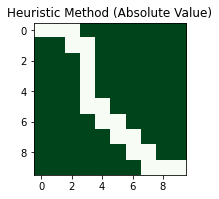

Optimal Path Time is: 863


In [91]:
heuristic_absolute_visualise(game_grid, path, vals)

In [92]:
## Game mode 2 - Using our heuristic method with smallest interval values between cells as path selection

In [93]:
# Using 'hi' as suffix to variables to indicate 'heuristic interval' method
game_grid_hi = grid.copy()

In [94]:
def heuristic_interval(grid, start_position=(0,0), end_position=(game_grid_hi.shape[0]-1, game_grid_hi.shape[1]-1)):
        """
        Args:
            start_position - tuple of type int defining starting coordinates
            end_position - tuple of type int defining ending coordinates
            
        Returns:
            optimal_path - list of tuples of type int, defining the path of grid coordinates yielding shortest path
            list_vals - list of ints, defining values corresponding to coordinates in optimal_path
        """
        
        # initialising variables
        optimal_path_hi = []
        optimal_vals_hi = []

        current = start_position
        travelled = 999999 # setting this to be a higher number than any in grid to mark as travelled
        
        # define grid edges (note do not need to define l_edge, t_edge as these are 0 and 0)
        b_edge = grid.shape[0]-1
        r_edge = grid.shape[1]-1
        
        # same process as previous method for positional movement selection
        while (current != end_position):
            if (current[0] < b_edge) and (current[1] < r_edge):
                up = (current[0] - 1, current[1])
                down = (current[0] + 1, current[1])
                left = (current[0], current[1] - 1)
                right = (current[0], current[1] + 1)
                
            elif current[0] >= b_edge:
                up = (current[0] - 1, current[1])
                down = (current[0], current[1])
                left = (current[0], current[1] - 1)
                right = (current[0], current[1] + 1)
                
            elif current[1] >= r_edge:
                up = (current[0] - 1, current[1])
                down = (current[0] + 1, current[1])
                left = (current[0], current[1] - 1)
                right = (current[0], current[1])
                
            value = { # dictionary for value of each move
                'Current' : grid[current],
                'Up' : grid[up],
                'Down' : grid[down],
                'Left' : grid[left],
                'Right' : grid[right]
            }
            
            interval_value = { # dictionary for interval value of each move, found from absolute value between current and next step
                'Current' : grid[current],
                'Up' : abs(grid[up]-grid[current]),
                'Down' : abs(grid[down]-grid[current]),
                'Left' : abs(grid[left]-grid[current]),
                'Right' : abs(grid[right]-grid[current])
            }
            
            # decision process for interval value, arbitrarily prioritises going down over right if they are the same
            if interval_value['Down'] <= interval_value['Right'] and current[0] < b_edge: 
                next_position = down
                optimal_vals_hi.append(interval_value['Down'])
            elif current[1] < r_edge:
                next_position = right
                optimal_vals_hi.append(interval_value['Right'])
            else: next_position = down and optimal_vals_hi.append(interval_value['Down'])
                

            # update path and increment variables
            optimal_path_hi.append(next_position)

            grid[current] = travelled
            current = next_position

        grid[tuple(end_position)] = travelled

        while travelled in optimal_vals_hi:
            optimal_vals_hi.remove(travelled)

        return optimal_path_hi, optimal_vals_hi

In [95]:
path_hi, vals_hi = heuristic_interval(game_grid_hi)

In [96]:
# Visualise in a heatmap:
def heuristic_interval_visualise(game_grid_hi, optimal_path_hi, optimal_vals_hi):
    fig = plt.figure()
    sub = fig.add_subplot(122)
    sub.set_title("Heuristic Method (Interval Value)")
    sub.imshow(game_grid_hi, cmap='Greens_r')
    plt.show()
    totalpathtime_hi = sum(optimal_vals_hi)
    print("Optimal Path Time is: " + str(totalpathtime_hi))

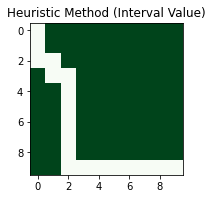

Optimal Path Time is: 571


In [97]:
heuristic_interval_visualise(game_grid_hi, path_hi, vals_hi)

In [98]:
game_grid_dijk = grid.copy()

In [99]:
## Unsuccessful grid conversion to dictionary method, was intended to be used in Dijkstra's algorithm where each grid location is a node and values (absolute or interval) represent the weights.

# def grid_convert(): # convert grid co-ordinates to dictionary
        
#         # initialising variables
#         grid_coords = []
#         for i in range(grid.shape[0]): # run loop over all cell co-ordinates to create list of all co-ordinates
#             for j in range(grid.shape[1]):
#                 grid_coords.append([i,j])
                
#         tuplelist = []
#         for x in grid_coords: # convert grid co-ordinate list to tuple
#             tuplelist.append(tuple(x))
#         reference_list = list(range(len(tuplelist)))
#         return tuplelist, reference_list
    
#         optimal_vals_dijk = []

#         current = start_position
#         travelled = 999999 # setting this to be a higher number than any in grid to mark as travelled
            
#         reference_list = list(range(len(tuplelist)))
#         reference_dict = dict(zip(tuplelist,reference_list))
        
#         dicts = {} # initialise empty dictionary
#         for i,j in tuplelist:
#             current = [i,j]
#             if grid.shape[0] == 1: # if 1-dimensional grid
#                 dicts[i,j] = {(0,j): 5}
#                 print(dicts) 
        
#         # define grid edges (note do not need to define l_edge, t_edge as these are 0 and 0)
#         b_edge = grid.shape[0]-1
#         r_edge = grid.shape[1]-1
        
#         # same process as previous method for positional movement selection
#         while (current != end_position):
#             if (current[0] < b_edge) and (current[1] < r_edge):
#                 up = (current[0] - 1, current[1])
#                 down = (current[0] + 1, current[1])
#                 left = (current[0], current[1] - 1)
#                 right = (current[0], current[1] + 1)
                
#             elif current[0] >= b_edge:
#                 up = (current[0] - 1, current[1])
#                 down = (current[0], current[1])
#                 left = (current[0], current[1] - 1)
#                 right = (current[0], current[1] + 1)
                
#             elif current[1] >= r_edge:
#                 up = (current[0] - 1, current[1])
#                 down = (current[0] + 1, current[1])
#                 left = (current[0], current[1] - 1)
#                 right = (current[0], current[1])
                
#             value = { # dictionary for value of each move
#                 'Current' : grid[current],
#                 'Up' : grid[up],
#                 'Down' : grid[down],
#                 'Left' : grid[left],
#                 'Right' : grid[right]
#             }
            
#             interval_value = { # dictionary for interval value of each move, found from absolute value between current and next step
#                 'Current' : grid[current],
#                 'Up' : abs(grid[up]-grid[current]),
#                 'Down' : abs(grid[down]-grid[current]),
#                 'Left' : abs(grid[left]-grid[current]),
#                 'Right' : abs(grid[right]-grid[current])
#             }
            
#             dicts[i,j] = {up: interval_value['Up'], down: interval_value['Down'], left: interval_value['Left'], right: interval_value['right']}
            
#             return dicts

In [100]:
# Code from https://bradfieldcs.com/algos/graphs/dijkstras-algorithm/ to show how Dijkstra's works, was intending to convert the grid to a dictionary as shown in cell above and pass to algorithm
# below, replacing 'example_graph' with our grid, but could not complete.

# import heapq # library containing priority queue

# def calculate_distances(grid, starting_vertex):
#     distances = {vertex: float('infinity') for vertex in grid}
#     distances[starting_vertex] = 0

#     pq = [(0, starting_vertex)] # initialise queue
#     while len(pq) > 0:
#         current_distance, current_vertex = heapq.heappop(pq) # pop and return smallest items from queue

#         # nodes can get added to the priority queue multiple times, only processing a vertex the first time we remove it from the priority queue.
#         if current_distance > distances[current_vertex]:
#             continue

#         for neighbor, weight in grid[current_vertex].items():
#             distance = current_distance + weight

#             # Only consider this new path if it's cheaper than any path we've
#             # already found.
#             if distance < distances[neighbor]:
#                 distances[neighbor] = distance
#                 heapq.heappush(pq, (distance, neighbor))

#     return distances

In [101]:
# example = {
#     'U': {'V': 2, 'W': 5, 'X': 1},
#     'V': {'U': 2, 'X': 2, 'W': 3},
#     'W': {'V': 3, 'U': 5, 'X': 3, 'Y': 1, 'Z': 5},
#     'X': {'U': 1, 'V': 2, 'W': 3, 'Y': 1},
#     'Y': {'X': 1, 'W': 1, 'Z': 1},
#     'Z': {'W': 5, 'Y': 1},
# }
# print(calculate_distances(example, 'X'))

In [102]:
# Unfortunately, I could not complete the Dijkstra's algorithm implementation. My intention was to use a similar version of that shown in [https://bradfieldcs.com/algos/graphs/dijkstras-algorithm/],
# using a priority queue to add values to each node progressively until all nodes had been populated.
# Therefore, I will be performing the statistical analysis simply on the heuristic algorithm that I developed earlier. 

In [103]:
## Size of the grid

In [104]:
def createGrid(grid_width, grid_height, min_val, max_val):
    grid = np.random.randint(min_val,max_val, grid_width*grid_height) #Set each cell to a random value between min_val and max_val
    grid = grid.reshape(grid_width, grid_height) #Re-order axes to make rows x columns
    return grid

In [107]:
## Distribution of values